In [1]:
import chainercv
from chainercv import utils
from chainercv.visualizations import vis_bbox, vis_point, vis_image
import numpy as np
from scipy import ndimage

%matplotlib inline

/Users/terasakisatoshi/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import cv2


def imread(path, mod='chainercv'):
    if mod == 'chainercv':
        return chainercv.utils.read_image(path)
    else:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # HWC -> CHW
        return img.transpose(2, 0, 1)

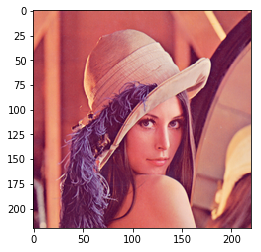

In [3]:
img = imread("lena.png")
vis_image(img)

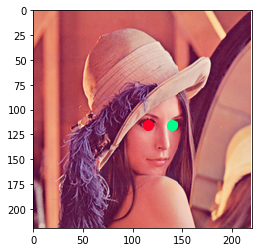

In [4]:
r_eye = [115, 115]
l_eye = [115, 140]
points = np.array([r_eye, l_eye])
vis_point(img, points)

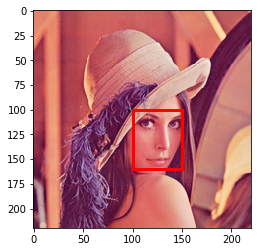

In [5]:
bbox = [[100, 100, 160, 150]]
vis_bbox(img, bbox)

In [6]:
def rotate_point(point_yx, degree, center_yx):
    offset_x, offset_y = center_yx
    shift = point_yx - center_yx
    shift_y, shift_x = shift[:, 0], shift[:, 1]
    cos_rad = np.cos(np.deg2rad(degree))
    sin_rad = np.sin(np.deg2rad(degree))
    qx = offset_x + cos_rad * shift_x + sin_rad * shift_y
    qy = offset_y - sin_rad * shift_x + cos_rad * shift_y
    return np.array([qy, qx]).transpose()


def rot_image(img, degree):
    # CHW => HWC
    img = img.transpose(1, 2, 0)
    rot = ndimage.rotate(img, degree, reshape=False)
    # HWC => CHW
    rot = rot.transpose(2, 0, 1)
    return rot


def rotate(img, keypoints, bbox, degree):
    new_keypoints = []
    center_yx = np.array(img.shape[1:])/2
    for points in keypoints:
        rot_points = rotate_point(np.array(points),
                                  degree,
                                  center_yx)
        new_keypoints.append(rot_points)

    new_bbox = []
    for x, y, w, h in bbox:
        points = np.array([[y+h/2, x+w/2]])
        ry, rx = rotate_point(points,
                              degree,
                              center_yx)[0]
        new_bbox.append([rx-w/2, ry-h/2, w, h])

    rot = rot_image(img, degree)
    return rot, new_keypoints, new_bbox

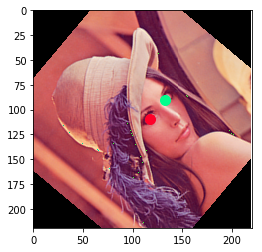

In [7]:
r_eye = [115, 115]
l_eye = [115, 140]
points = np.array([r_eye, l_eye])
keypoints = [
    points
]

b = [100, 100, 160, 150]  # ymin,xmin,ymax,ymax
b = [100, 100, 50, 60]  # y,x,w,h
bbox = [
    np.asarray(b)
]
rot, rot_keypoints, rot_bbox = rotate(img, keypoints, bbox, 50)
vis_point(rot, rot_keypoints[0])

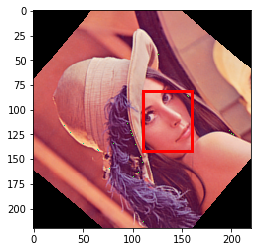

In [8]:
rot_bbox = [[y, x, y+h, x+w] for x, y, w, h in rot_bbox]
vis_bbox(rot, rot_bbox)